<a href="https://colab.research.google.com/github/nikhil1014/Musk-or-Non-musk/blob/master/Musk_or_Non_musk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing File from Drive**

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd

In [0]:
Link='https://drive.google.com/open?id=1QDMSUjfFE3lK6_7Fu2E4ciMu1b4bJvwQ'

In [4]:
fluff, ID = Link.split('=')
print (ID)

1QDMSUjfFE3lK6_7Fu2E4ciMu1b4bJvwQ


In [0]:
downloaded=drive.CreateFile({'id':'1QDMSUjfFE3lK6_7Fu2E4ciMu1b4bJvwQ'}) 
downloaded.GetContentFile('musk_csv.csv')  
df = pd.read_csv('musk_csv.csv')

**Dataset**

In [43]:
df

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,-230,-28,-150,-63,-55,-77,-108,-308,-221,-41,-57,12,-112,-183,-198,-35,137,-198,-168,-153,-51,252,-108,135,-121,119,-120,73,28,...,224,-18,-96,43,1,-76,-53,-38,-23,-176,-32,-205,-95,-124,-139,-153,-170,-178,-102,-113,-42,-67,-141,-96,-112,-113,-47,124,-12,62,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,-225,-32,-124,-77,-43,-74,-100,-291,-215,-25,-49,6,-121,-183,-201,-54,127,-204,-164,-160,-41,255,-117,-104,-14,133,-157,141,46,...,232,-6,-146,-88,-75,-74,-55,-30,-28,-175,-48,-202,-86,-125,-138,-154,-169,-178,-102,-123,-32,-52,-136,-98,-109,-112,-56,-49,-85,60,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,-219,-12,-107,-66,-58,-82,-77,-288,-214,-21,-58,-32,-93,-183,-197,-71,218,-217,-164,-161,-59,243,-117,-103,-14,118,-157,140,-150,...,167,-13,-188,-89,-117,-57,-47,-33,-28,-175,-50,-216,-129,-130,-138,-155,-169,-178,-102,-124,-32,-51,-136,-98,-123,-112,-55,-47,-84,-226,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,-224,-30,-129,-54,-60,-86,-88,-307,-221,-39,-58,-12,-86,-184,-180,-61,221,-211,-168,-154,-63,243,-107,136,-121,116,-122,73,-155,...,167,7,-170,43,-6,-61,-47,-43,-23,-176,-33,-212,-131,-113,-139,-153,-170,-178,-103,-114,-42,-66,-141,-96,-123,-113,-46,124,-11,-238,86,99,-14,-31,106,171,-44,-116,117,0


In [0]:
df.shape

(6598, 170)

**Loading Libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [7]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


**Pre-processing**

In [0]:
#Modifications to the dataset
cols=["ID","molecule_name","conformation_name"]
X=df.drop(cols,axis=1)
Y=df["class"]

In [32]:
#Normalization
from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)
normalized_X

array([[ 0.02654373, -0.06232005, -0.03462225, ..., -0.0646282 ,
         0.0553956 ,  0.00057704],
       [ 0.02458417, -0.1127274 , -0.086944  , ..., -0.08154748,
         0.04736949,  0.00059961],
       [ 0.02747441, -0.11587034, -0.08660412, ..., -0.08660412,
         0.02329352,  0.00059727],
       ...,
       [ 0.02704474, -0.06269462, -0.01167841, ..., -0.08851005,
        -0.00368792,  0.        ],
       [ 0.03162205, -0.07502487, -0.01426093, ..., -0.07192467,
         0.07254471,  0.        ],
       [ 0.03357358, -0.08031327, -0.01514103, ..., -0.07570513,
         0.07768004,  0.        ]])

In [0]:
#Data Splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(normalized_X,Y,test_size=0.2,random_state=0)

In [0]:
print(x_train.shape)

(5278, 167)


In [0]:
print (y_train.shape)

(5278,)


In [0]:
print (x_test.shape)

(1320, 167)


In [0]:
print(y_test.shape)

(1320,)


In [0]:
train_x,val_x,train_y,val_y=train_test_split(X,Y,random_state=1)
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(n_estimators=100).fit(train_x,train_y)

In [0]:
#Permutation Importance (deriving which column is more important in the datatset)
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
perm=PermutationImportance(rfc_model,random_state=1).fit(val_x,val_y)

     |████████████████████████████████| 112kB 2.9MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
#Showing weights of features
eli5.show_weights(perm,feature_names=val_x.columns.tolist(),top=167)

**Visualization**

In [0]:
df.groupby('class').count()['ID']             #3:169

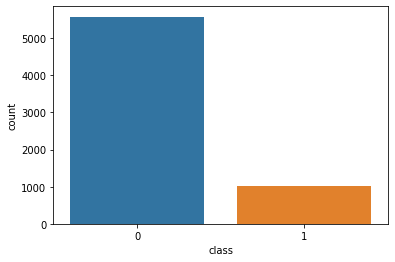

In [11]:
import seaborn as sns             
sns.countplot(df['class'])

*Correlation Matrix*

In [0]:
#Matrix 1
cnames_1=df.iloc[:,3:33]

In [0]:
corr_1=cnames_1.corr()

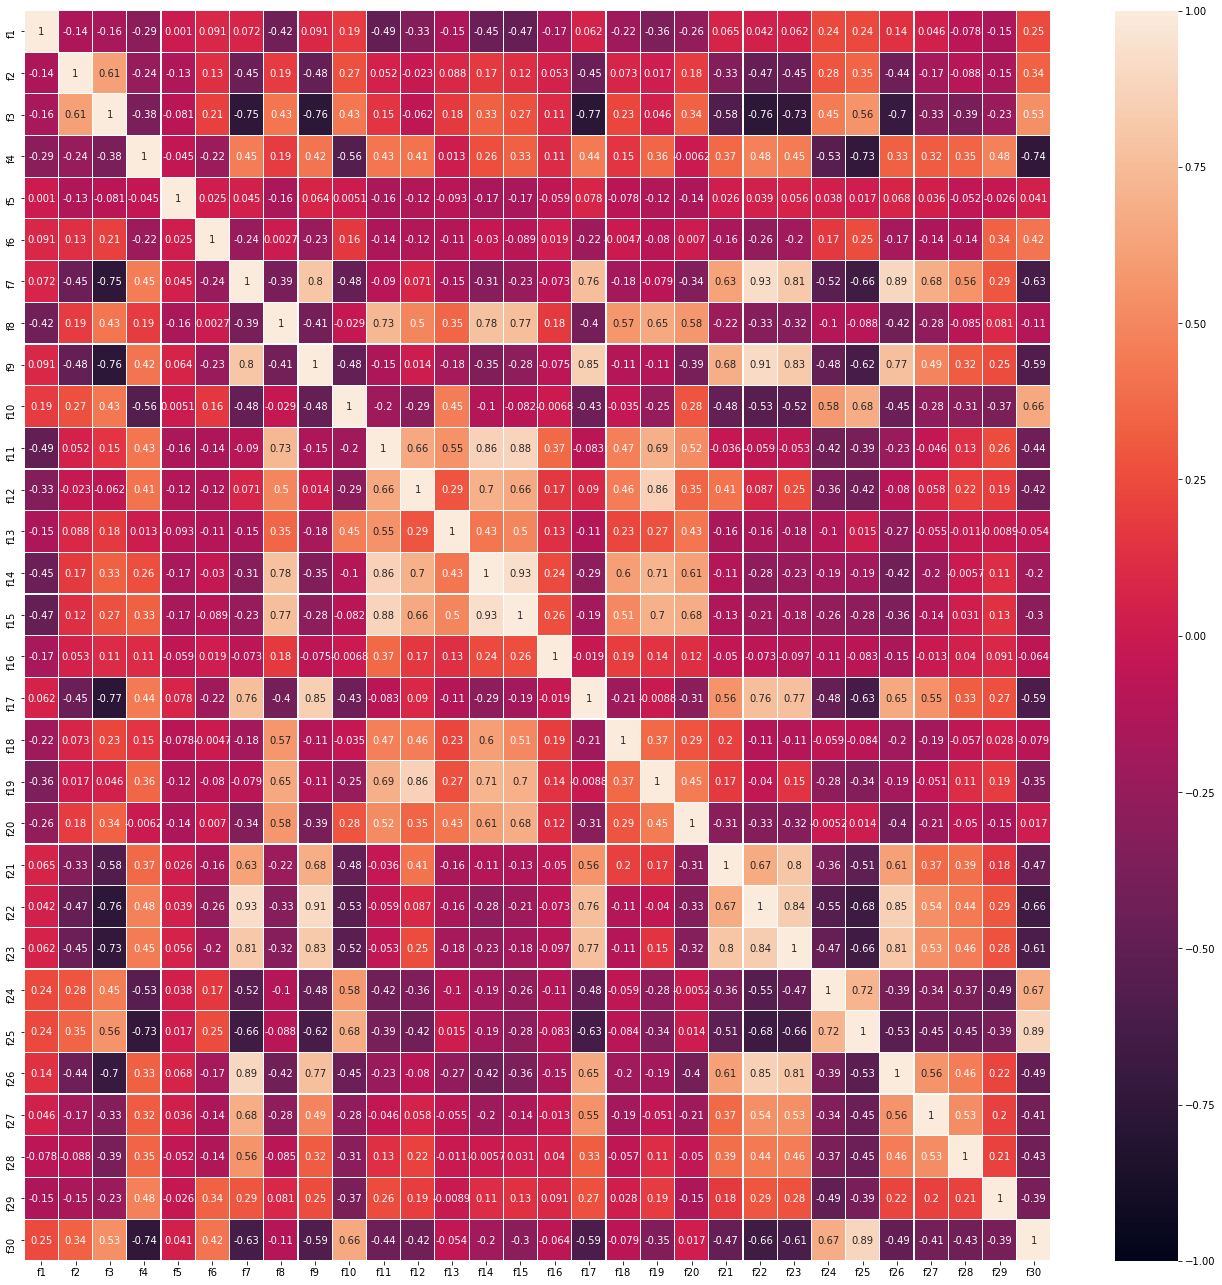

In [12]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(23,23))
cmap=sns.diverging_palette(23,23,as_cmap=True)
htm=sns.heatmap(corr_1,ax=ax,annot=True,vmin=-1,linewidths=0.2)

In [0]:
#Matrix 2
cnames_2=df.iloc[:,33:64]

In [0]:
corr_2=cnames_2.corr()

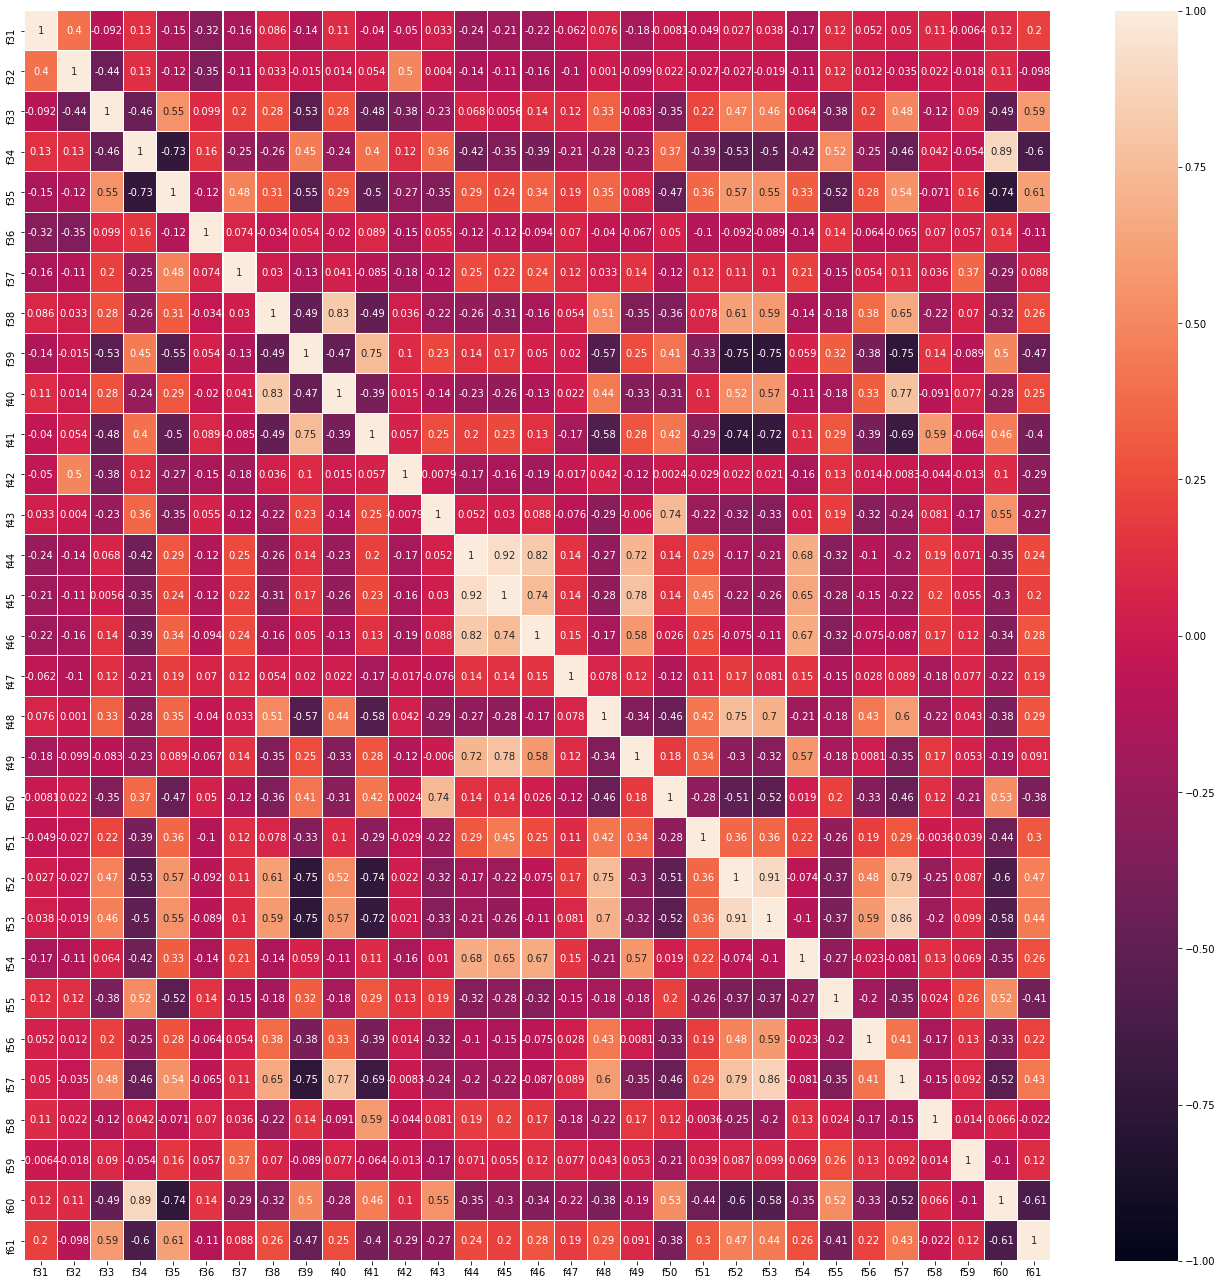

In [0]:
fig,ax=plt.subplots(figsize=(23,23))
cmap=sns.diverging_palette(23,23,as_cmap=True)
htm=sns.heatmap(corr_2,ax=ax,annot=True,vmin=-1,linewidths=0.2)

In [0]:
#Matrix 3
cnames_3=df.iloc[:,64:95]

In [0]:
corr_3=cnames_3.corr()

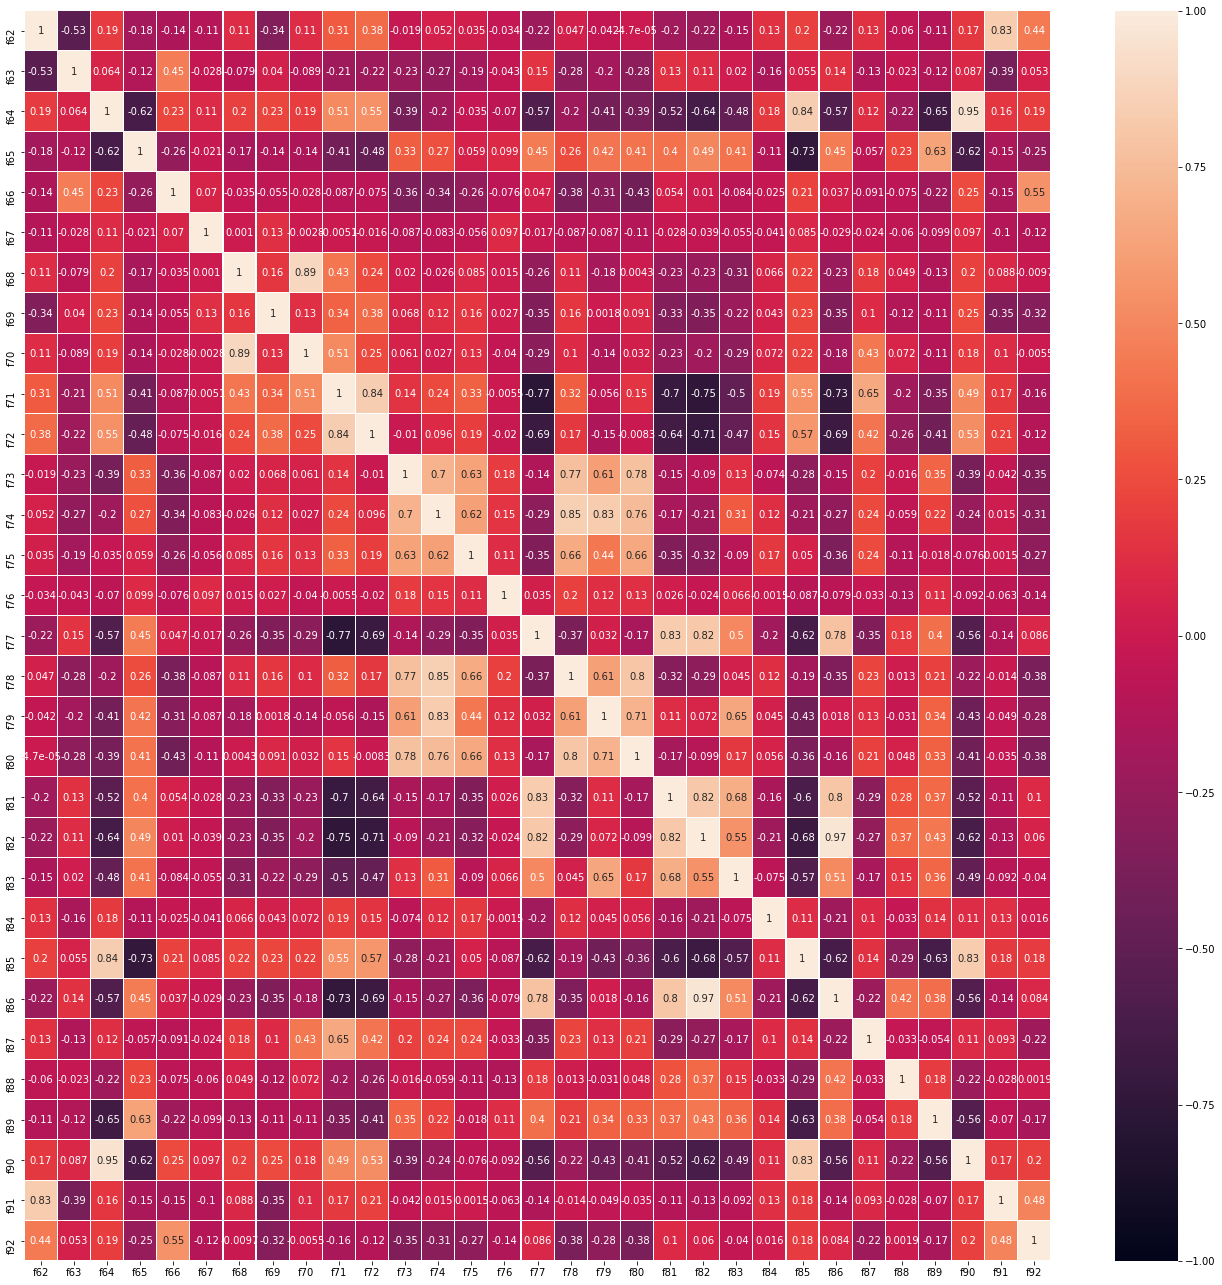

In [0]:
fig,ax=plt.subplots(figsize=(23,23))
cmap=sns.diverging_palette(23,23,as_cmap=True)
htm=sns.heatmap(corr_3,ax=ax,annot=True,vmin=-1,linewidths=0.2)

In [0]:
#Matrix 4
cnames_4=df.iloc[:,95:125]

In [0]:
corr_4=cnames_4.corr()

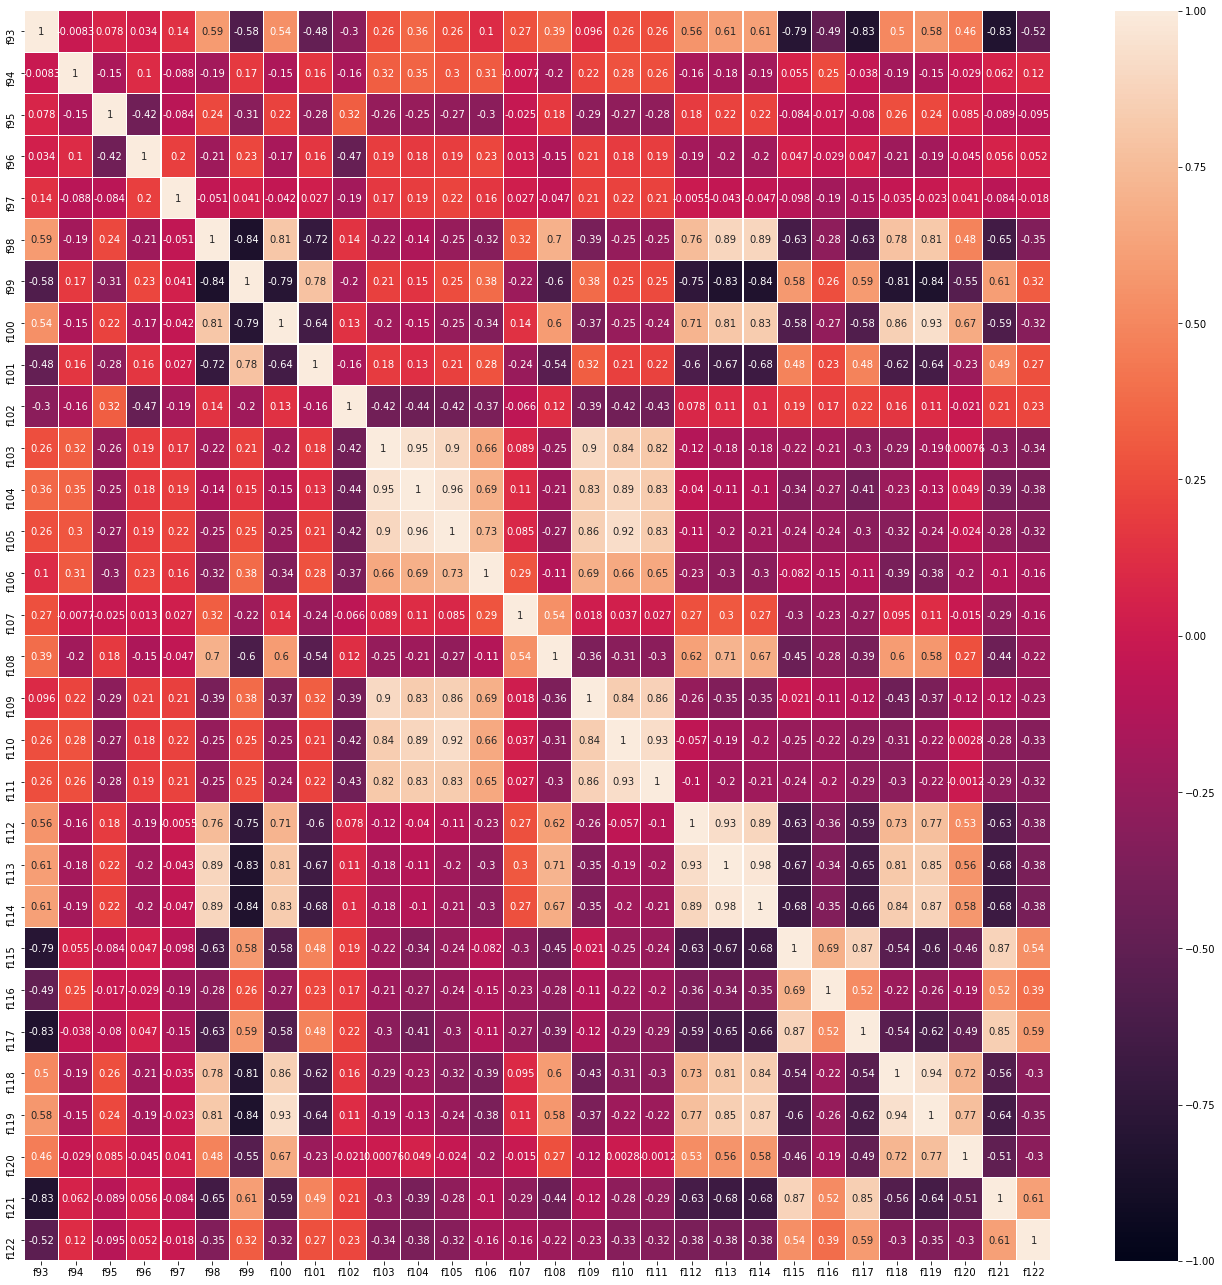

In [18]:
fig,ax=plt.subplots(figsize=(23,23))
cmap=sns.diverging_palette(23,23,as_cmap=True)
htm=sns.heatmap(corr_4,ax=ax,annot=True,vmin=-1,linewidths=0.2)

In [0]:
#Matrix 5
cnames_5=df.iloc[:,125:155]

In [0]:
corr_5=cnames_5.corr()

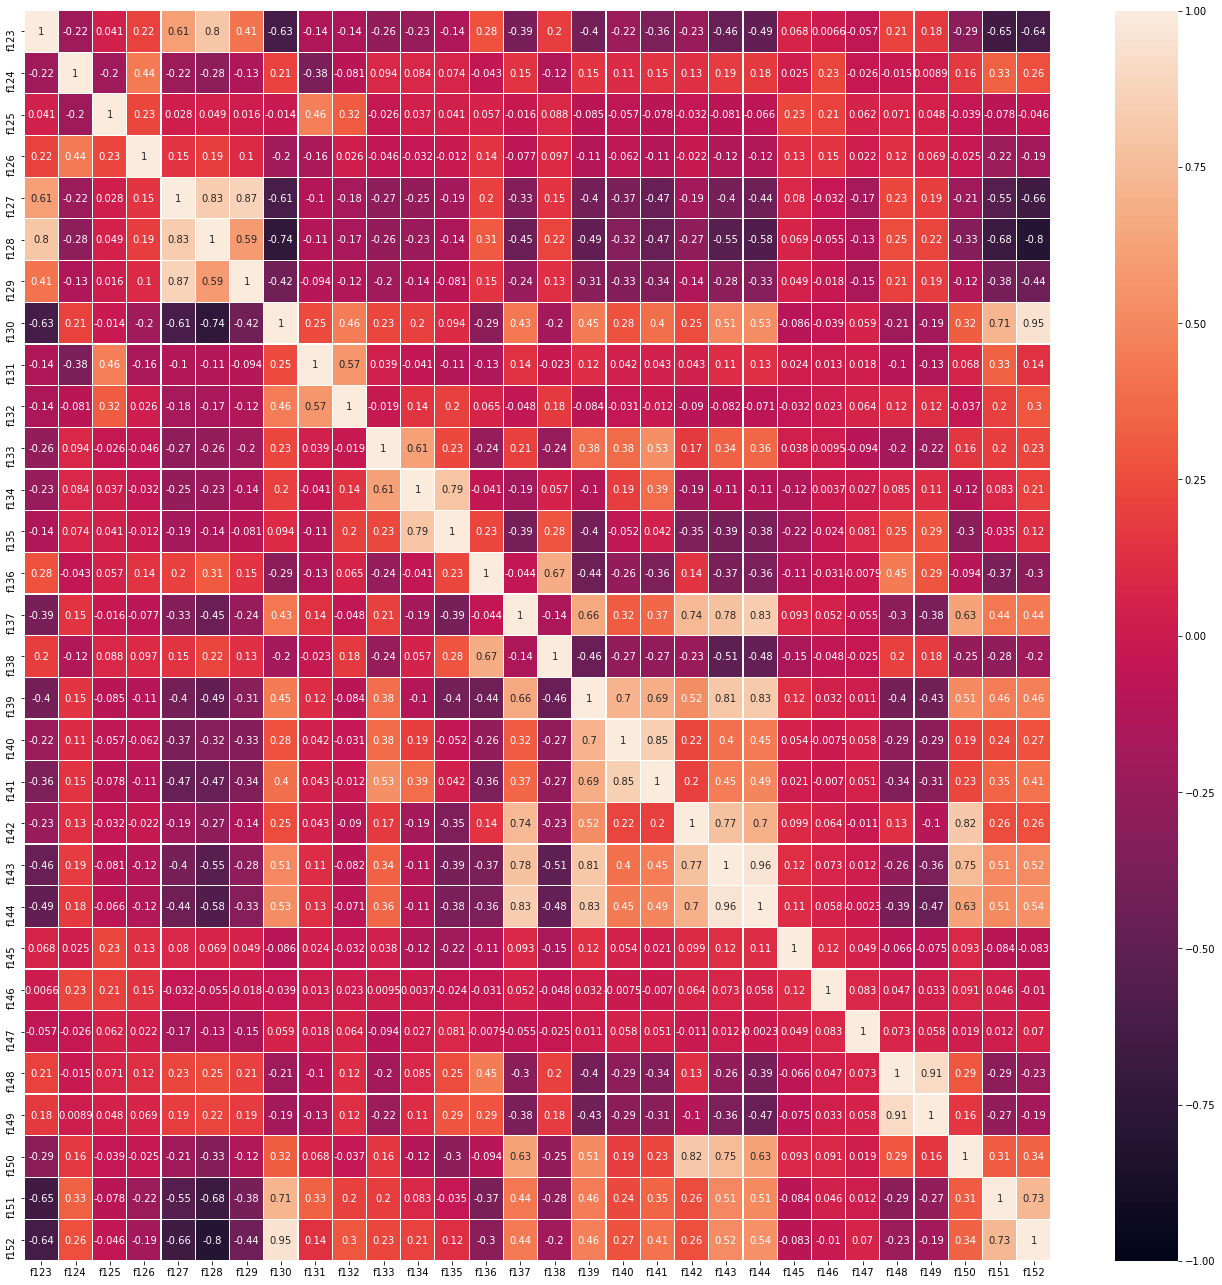

In [21]:
fig,ax=plt.subplots(figsize=(23,23))
cmap=sns.diverging_palette(23,23,as_cmap=True)
htm=sns.heatmap(corr_5,ax=ax,annot=True,vmin=-1,linewidths=0.2)

In [0]:
#Matrix 6
cnames_6=df.iloc[:,155:169]

In [0]:
corr_6=cnames_6.corr()

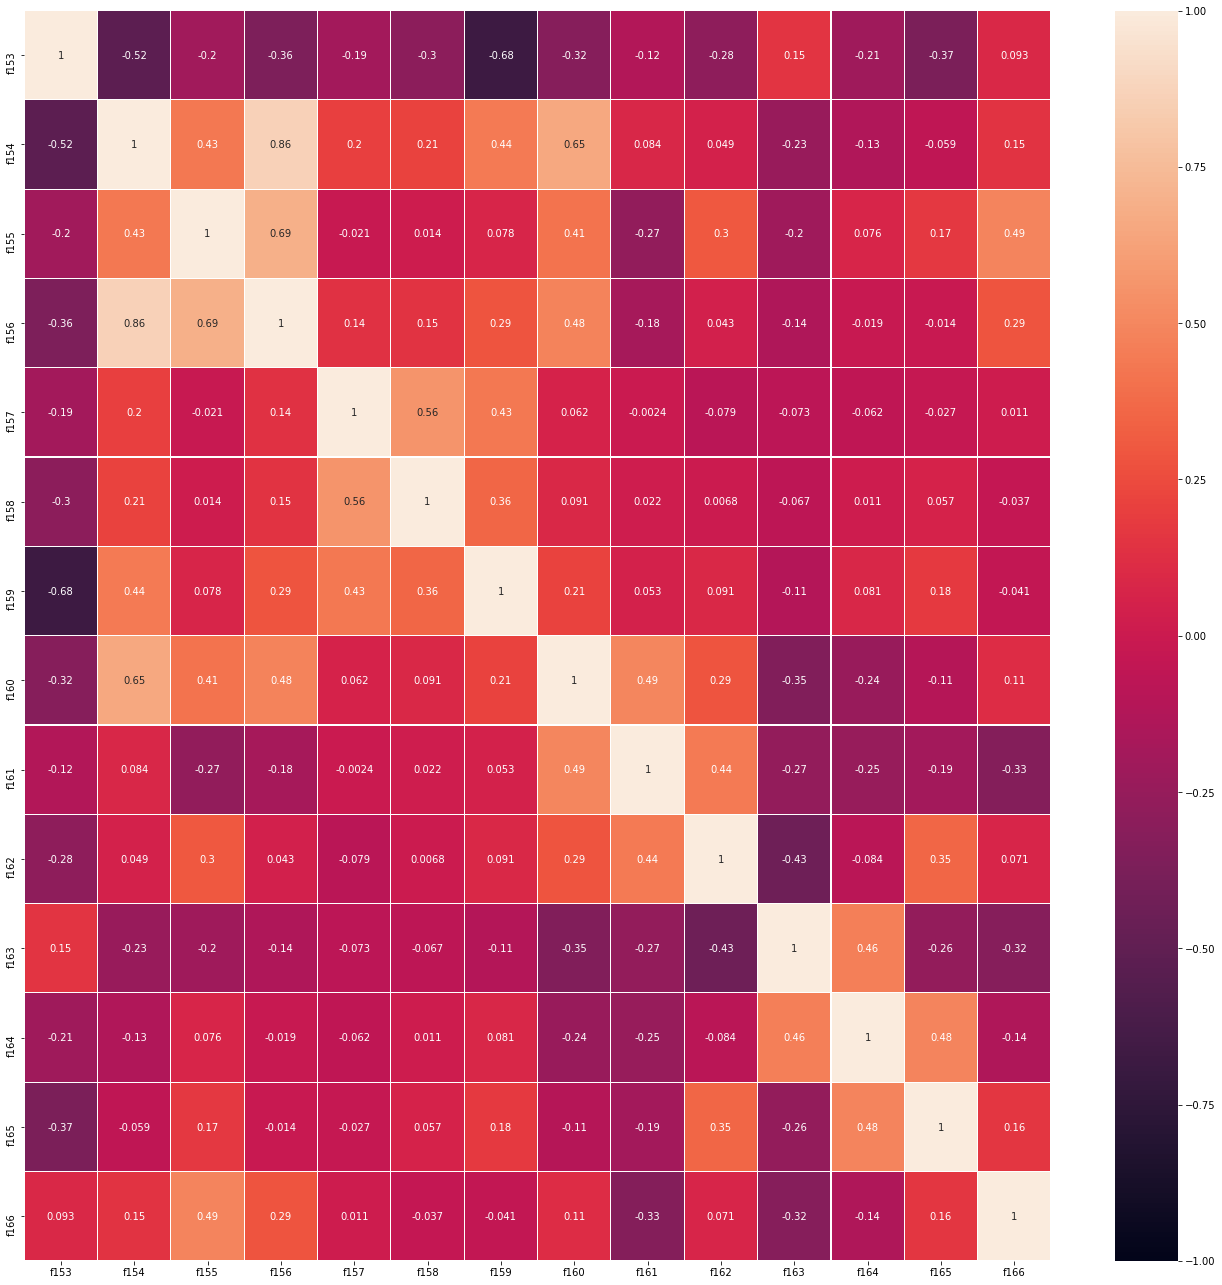

In [27]:
fig,ax=plt.subplots(figsize=(23,23))
cmap=sns.diverging_palette(23,23,as_cmap=True)
htm=sns.heatmap(corr_6,ax=ax,annot=True,vmin=-1,linewidths=0.2)

**Model Training**

In [0]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=167))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [36]:
#MODEL COMPILING
model.compile(optimizer ='Adam',loss='binary_crossentropy', metrics =['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                2688      
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

#First run the with history_1 having epochs=80 then run the cell with history having epochs=10. Use code cell having name history.
*The number of epochs is the number of complete passes through the training dataset. It helps in model to learn things and to increase accuracy.* 

In [0]:
history_1=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=80, verbose=1,batch_size=35)

In [40]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10, verbose=1,batch_size=35)

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 0s 71us/step - loss: 0.0219 - acc: 0.9913 - val_loss: 0.0132 - val_acc: 0.9947
Epoch 2/10
5278/5278 [==============================] - 0s 67us/step - loss: 0.0245 - acc: 0.9913 - val_loss: 0.0180 - val_acc: 0.9947
Epoch 3/10
5278/5278 [==============================] - 0s 67us/step - loss: 0.0138 - acc: 0.9958 - val_loss: 0.0067 - val_acc: 0.9985
Epoch 4/10
5278/5278 [==============================] - 0s 70us/step - loss: 0.0216 - acc: 0.9924 - val_loss: 0.0256 - val_acc: 0.9924
Epoch 5/10
5278/5278 [==============================] - 0s 69us/step - loss: 0.0130 - acc: 0.9958 - val_loss: 0.0195 - val_acc: 0.9947
Epoch 6/10
5278/5278 [==============================] - 0s 77us/step - loss: 0.0194 - acc: 0.9943 - val_loss: 0.0296 - val_acc: 0.9894
Epoch 7/10
5278/5278 [==============================] - 0s 81us/step - loss: 0.0223 - acc: 0.9917 - val_loss: 0.0224 - val_acc: 0.9894
Epoch 8

**Evaluation of Training and Validation dataset-Accuracy & Loss**

In [0]:
train_loss, train_acc = model.evaluate(x_train, y_train)
train_acc, train_loss

5278/5278 [==============================] - 0s 26us/step


(0.9982948086396363, 0.006558320927427345)

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc, test_loss

1320/1320 [==============================] - 0s 32us/step


(0.9931818181818182, 0.02306155358269693)

**Plots of Accuracy and Loss-Training & Validation**

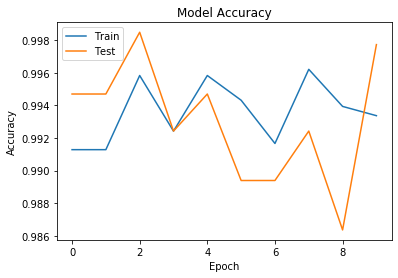

In [41]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

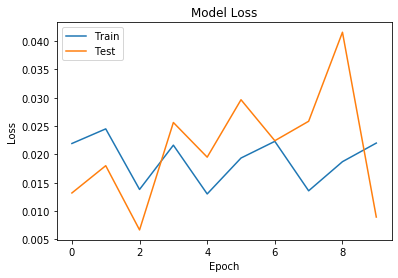

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Predicting on test set**

In [0]:
pred=model.predict(x_test)
pred

array([[1.1920929e-07],
       [9.2270589e-01],
       [1.4424324e-04],
       ...,
       [3.3706427e-05],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [0]:
yhat_classes=model.predict_classes(x_test)

**Converting to 1D Array**

In [0]:
pred=pred[:,0]
yhat_classes=yhat_classes[:,0]

**Accuracy, Precision, Recall, F1 Score, ROC AUC Score**

In [0]:
accuracy=accuracy_score(y_test,yhat_classes)
print('Accuracy:%f'% accuracy)

Accuracy:0.993182


In [0]:
precision=precision_score(y_test,yhat_classes)
print('Precision:%f'% precision)

Precision:0.994819


In [0]:
recall=recall_score(y_test,yhat_classes)
print('Recall:%f'% recall)

Recall:0.960000


In [0]:
f1=f1_score(y_test,yhat_classes)
print('F1_score:%f'% f1)

F1_score:0.977099


In [0]:
roc_auc_score=roc_auc_score(y_test,yhat_classes)
print('ROC_AUC_Score:%f'% roc_auc_score)

ROC_AUC_Score:0.979554


**Converting predictions to string**

In [0]:
y_pred=(pred>0.5)
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])